In [1]:
import numpy as np
import matplotlib.pyplot as plt

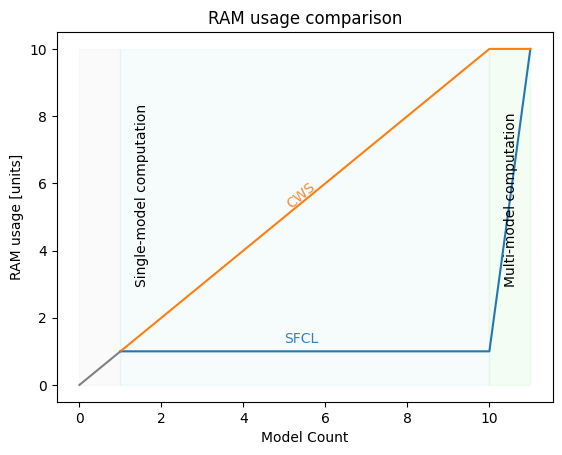

In [2]:
"""
In this notebook, we compare the performance (RAM and Disk usage) of the SFCL (simulate first, compute later) and CWS (compute while simulating).
We observe that SFCL has a better RAM usage (O(n)) than CWS (O(n^2)), while the disk usage is the same for both (O(n)).
"""

model_IDs = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])
sfcl_demand = np.array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 10]) # => 5*n + n = n 
cws_demand = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 10]) # => n*(n+1) = n^2


# simulate both of them in the same graph, with the title "RAM usage comparison"
# between 1-10 make the background a different color (hardly visible), mention on the background these are individual models computation - make a very light green
# between 10-11 make the background a different color (hardly visible), mention on the background these are the ensemble computation (of the multi-model)
# write under the model 11 that that is the multi-model ensemble, without getting out of the graph (maybe vertically?)
# write the name of the models on the line they generate, instead of the legend (actually, delete the legend)

plt.plot(model_IDs, sfcl_demand, label="SFCL")
plt.plot(model_IDs, cws_demand, label="CWS")
plt.plot([0,1],[0,1], color="gray")
plt.xlabel("Model Count")
plt.ylabel("RAM usage [units]")
plt.fill_between([0, 1], 0, 10, color="lightgray", alpha=0.1, label="Individual models")
plt.fill_between([1, 10], 0, 10, color="lightblue", alpha=0.1, label="Individual models")
plt.fill_between([10, 11], 0, 10, color="lightgreen", alpha=0.1, label="Ensemble model")
plt.text(1.35, 3, "Single-model computation", rotation=90)
plt.text(10.35, 3, "Multi-model computation", rotation=90)
plt.text(5, 1.25, "SFCL", rotation=0, color="#3283BB")
plt.text(5, 5.25, "CWS", rotation=40, color="#EF8C3C")

plt.title("RAM usage comparison")
# save plot under the name of /ram_usage_comparison.pdf
plt.savefig("plots/ram_usage_comparison.pdf")


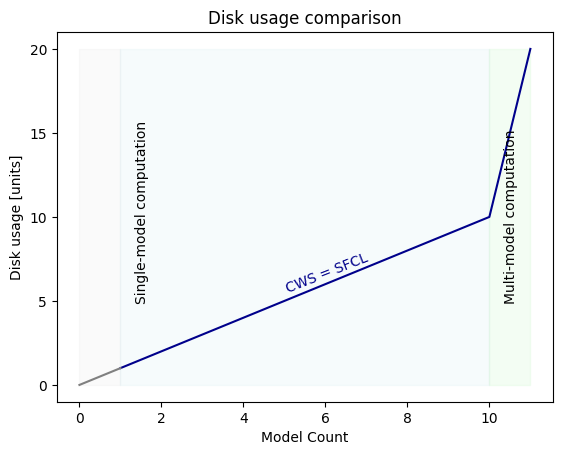

In [3]:
"""
storage (disk) usage comparison, per model, per method
"""

model_IDs = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])
sfcl_demand_disk = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20]) # => 5*n + n = n 
cws_demand_disk = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20]) # => n*(n+1) = n^2

plt.plot(model_IDs, sfcl_demand_disk, label="SFCL", color="darkblue")
plt.plot([0,1],[0,1], color="gray")
plt.xlabel("Model Count")
plt.ylabel("Disk usage [units]")
plt.yticks([0, 5, 10, 15, 20])
plt.fill_between([0, 1], 0, 20, color="lightgray", alpha=0.1, label="Individual models")
plt.fill_between([1, 10], 0, 20, color="lightblue", alpha=0.1, label="Individual models")
plt.fill_between([10, 11], 0, 20, color="lightgreen", alpha=0.1, label="Ensemble model")
plt.text(1.35, 5, "Single-model computation", rotation=90)
plt.text(10.35, 5, "Multi-model computation", rotation=90)
plt.text(5, 5.5, "CWS = SFCL", rotation=21.5, color="darkblue")

plt.title("Disk usage comparison")
plt.savefig("plots/disk_usage_comparison.pdf")

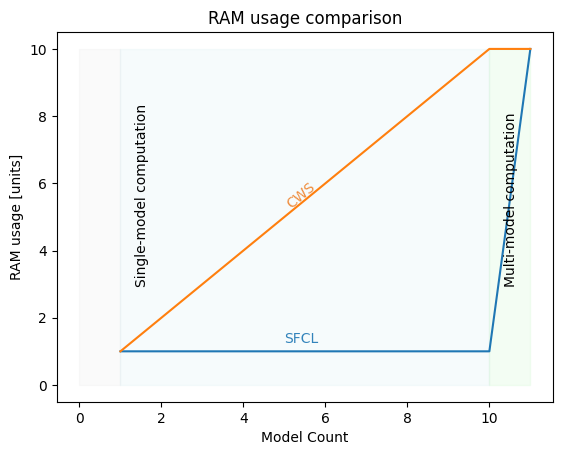

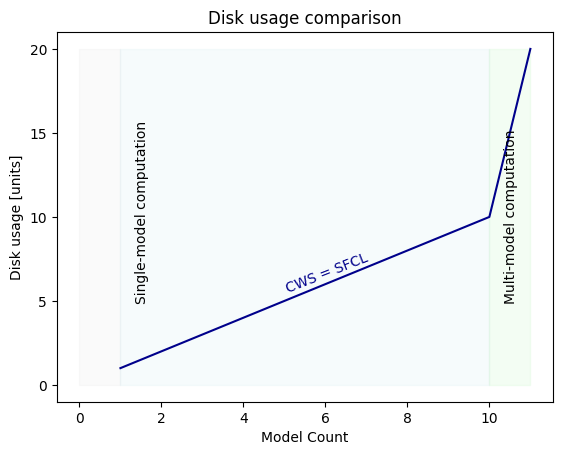

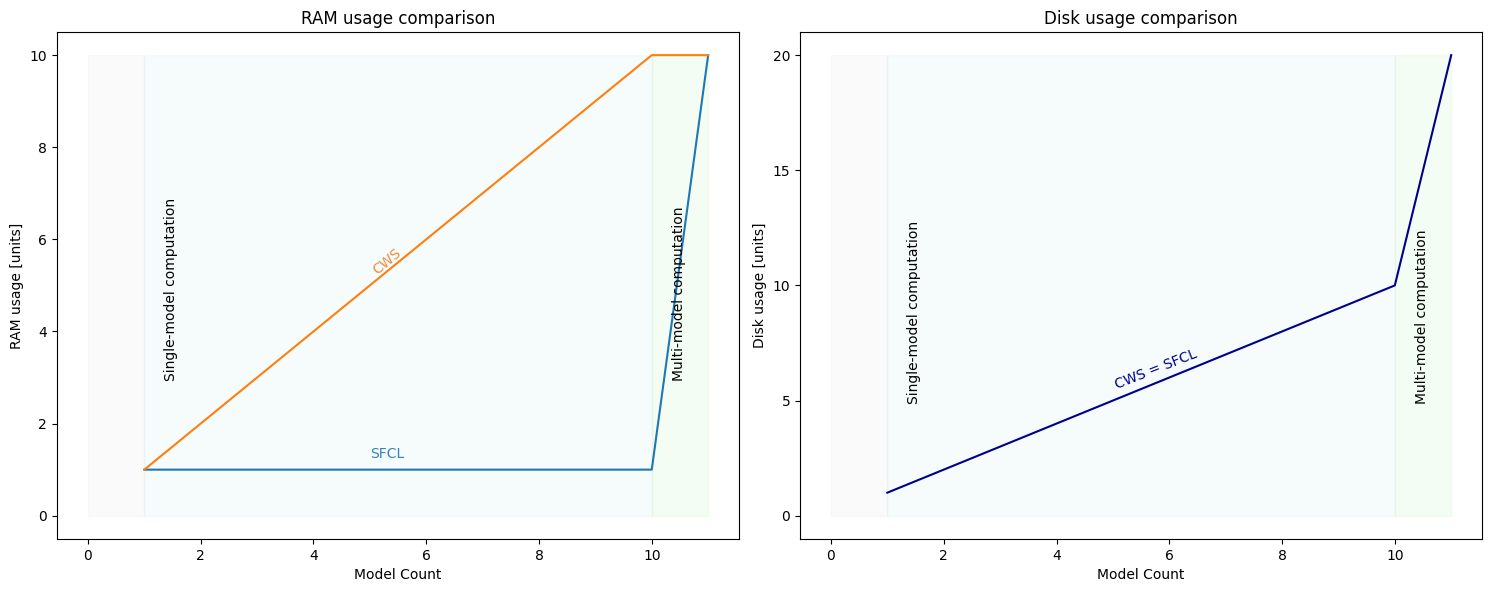

In [30]:
"""
same as above, yet saving in the same plot
"""

from matplotlib.backends.backend_pdf import PdfPages

# Create the RAM usage plot
model_IDs = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])
sfcl_demand = np.array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 10])
cws_demand = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 10])

fig, ax1 = plt.subplots()
ax1.plot(model_IDs, sfcl_demand, label="SFCL")
ax1.plot(model_IDs, cws_demand, label="CWS")
ax1.set_xlabel("Model Count")
ax1.set_ylabel("RAM usage [units]")
ax1.fill_between([0, 1], 0, 10, color="lightgray", alpha=0.1, label="Individual models")
ax1.fill_between([1, 10], 0, 10, color="lightblue", alpha=0.1, label="Individual models")
ax1.fill_between([10, 11], 0, 10, color="lightgreen", alpha=0.1, label="Ensemble model")
ax1.text(1.35, 3, "Single-model computation", rotation=90)
ax1.text(10.35, 3, "Multi-model computation", rotation=90)
ax1.text(5, 1.25, "SFCL", rotation=0, color="#3283BB")
ax1.text(5, 5.25, "CWS", rotation=40, color="#EF8C3C")
ax1.set_title("RAM usage comparison")

# Create the disk usage plot
sfcl_demand_disk = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20])
cws_demand_disk = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20])

fig, ax2 = plt.subplots()
ax2.plot(model_IDs, sfcl_demand_disk, label="SFCL", color="darkblue")
ax2.set_xlabel("Model Count")
ax2.set_ylabel("Disk usage [units]")
ax2.set_yticks([0, 5, 10, 15, 20])
ax2.fill_between([0, 1], 0, 20, color="lightgray", alpha=0.1, label="Individual models")
ax2.fill_between([1, 10], 0, 20, color="lightblue", alpha=0.1, label="Individual models")
ax2.fill_between([10, 11], 0, 20, color="lightgreen", alpha=0.1, label="Ensemble model")
ax2.text(1.35, 5, "Single-model computation", rotation=90)
ax2.text(10.35, 5, "Multi-model computation", rotation=90)
ax2.text(5, 5.5, "CWS = SFCL", rotation=21.5, color="darkblue")
ax2.set_title("Disk usage comparison")

# Save both plots in a single PDF file
with PdfPages('plots/comparison_plots.pdf') as pdf:
    pdf.savefig(ax1.figure)
    pdf.savefig(ax2.figure)

# Save both plots side by side in a single PDF file
with PdfPages('plots/comparison_plots.pdf') as pdf:
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

    # Plot RAM usage comparison
    ax1.plot(model_IDs, sfcl_demand, label="SFCL")
    ax1.plot(model_IDs, cws_demand, label="CWS")
    ax1.set_xlabel("Model Count")
    ax1.set_ylabel("RAM usage [units]")
    ax1.fill_between([0, 1], 0, 10, color="lightgray", alpha=0.1, label="Individual models")
    ax1.fill_between([1, 10], 0, 10, color="lightblue", alpha=0.1, label="Individual models")
    ax1.fill_between([10, 11], 0, 10, color="lightgreen", alpha=0.1, label="Ensemble model")
    ax1.text(1.35, 3, "Single-model computation", rotation=90)
    ax1.text(10.35, 3, "Multi-model computation", rotation=90)
    ax1.text(5, 1.25, "SFCL", rotation=0, color="#3283BB")
    ax1.text(5, 5.25, "CWS", rotation=40, color="#EF8C3C")
    ax1.set_title("RAM usage comparison")

    # Plot disk usage comparison
    ax2.plot(model_IDs, sfcl_demand_disk, label="SFCL", color="darkblue")
    ax2.set_xlabel("Model Count")
    ax2.set_ylabel("Disk usage [units]")
    ax2.set_yticks([0, 5, 10, 15, 20])
    ax2.fill_between([0, 1], 0, 20, color="lightgray", alpha=0.1, label="Individual models")
    ax2.fill_between([1, 10], 0, 20, color="lightblue", alpha=0.1, label="Individual models")
    ax2.fill_between([10, 11], 0, 20, color="lightgreen", alpha=0.1, label="Ensemble model")
    ax2.text(1.35, 5, "Single-model computation", rotation=90)
    ax2.text(10.35, 5, "Multi-model computation", rotation=90)
    ax2.text(5, 5.5, "CWS = SFCL", rotation=21.5, color="darkblue")
    ax2.set_title("Disk usage comparison")

    # plt.subplots_adjust(left=0, right=1)
    # padding to the left 5px
    plt.tight_layout(pad=1)
    
    pdf.savefig(fig)
    
